# 🎵 Spotify Library Analysis

Analyze your **owned playlists** with visualizations and insights.

**Prerequisites:** Run `01_sync_data.ipynb` first to download your library.

**Features:**
- 📊 Library overview & statistics
- 📂 Playlist breakdown
- 🎤 Top artists & genres
- 📈 Popularity distribution
- 📅 Release year timeline
- 💎 Hidden gems

**⚙️ Modular Filtering:** Configure which playlists to analyze in the Configuration section below!

## ⚙️ Configuration

**Edit the filters below to customize your analysis!**


In [1]:
# ============================================================================
# 🎛️ ANALYSIS FILTERS - Edit these to customize your analysis!
# ============================================================================

# Exclude special playlists from analysis
EXCLUDE_LIKED_SONGS = True    # Set True to exclude Liked Songs master playlist
EXCLUDE_MONTHLY = True        # Set True to exclude monthly playlists (Jan'25, Dec'24, etc.)

# Analyze only specific playlists by name (leave empty [] for all owned playlists)
# Example: ["Chill Vibes", "Workout Mix", "Road Trip"]
INCLUDE_ONLY_PLAYLISTS = []

# Exclude specific playlists by name
# Example: ["Test Playlist", "Old Stuff"]
EXCLUDE_PLAYLISTS = []

print("✅ Configuration loaded!")
print(f"   • Exclude Liked Songs: {EXCLUDE_LIKED_SONGS}")
print(f"   • Exclude Monthly: {EXCLUDE_MONTHLY}")
print(f"   • Include only: {INCLUDE_ONLY_PLAYLISTS if INCLUDE_ONLY_PLAYLISTS else 'All owned playlists'}")
print(f"   • Exclude: {EXCLUDE_PLAYLISTS if EXCLUDE_PLAYLISTS else 'None'}")


✅ Configuration loaded!
   • Exclude Liked Songs: True
   • Exclude Monthly: True
   • Include only: All owned playlists
   • Exclude: None


## 1️⃣ Setup

In [2]:
# Install visualization libraries
%pip install -q matplotlib seaborn pandas pyarrow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter

# Style
plt.style.use('dark_background')
sns.set_palette("husl")

# Data directory
DATA_DIR = Path("..") / "data"

print(f"📁 Loading data from: {DATA_DIR.resolve()}")

📁 Loading data from: /Users/aryamaan/Desktop/Projects/spotifyframes_repo/data


## 2️⃣ Load Data (Owned Playlists Only)

In [4]:
# Import shared utilities
from lib import LibraryAnalyzer, get_genres_list, build_playlist_genre_profiles

# Load data
try:
    analyzer = LibraryAnalyzer(DATA_DIR).load()
    
    # Show detected monthly playlists
    monthly_names = analyzer.get_monthly_playlist_names()
    if monthly_names:
        print(f"\n📅 Monthly playlists detected ({len(monthly_names)}): {monthly_names[:5]}{'...' if len(monthly_names) > 5 else ''}")
except FileNotFoundError as e:
    print(f"❌ {e}")
    print("\n👉 Run 01_sync_data.ipynb first!")
    raise

✅ Loaded 555 playlists, 5,232 tracks

📅 Monthly playlists detected (10): ['Apr25', 'Aug25', 'Feb25', 'Jul24', 'Jul25']...


In [5]:
# Apply filters from configuration
analyzer.filter(
    exclude_liked=EXCLUDE_LIKED_SONGS,
    exclude_monthly=EXCLUDE_MONTHLY,
    include_only=INCLUDE_ONLY_PLAYLISTS if INCLUDE_ONLY_PLAYLISTS else None,
    exclude_names=EXCLUDE_PLAYLISTS if EXCLUDE_PLAYLISTS else None
)

# Convenience references for analysis
playlists = analyzer.playlists
tracks = analyzer.tracks
artists = analyzer.artists
playlist_tracks = analyzer.playlist_tracks
track_artists = analyzer.track_artists
owned_track_ids = set(tracks['track_id'])

   ✗ Excluded Liked Songs
   ✗ Excluded 10 monthly playlists

📊 Analysis scope:
   115 playlists | 3,811 tracks | 2,138 artists


## 3️⃣ Library Overview

In [6]:
# Calculate totals
total_tracks = len(tracks)
total_artists = len(artists)
total_playlists = len(playlists)
total_duration_hrs = tracks["duration_ms"].sum() / (1000 * 60 * 60)

# Liked songs
liked_songs = playlists[playlists["is_liked_songs"] == True]
liked_count = liked_songs["track_count"].iloc[0] if len(liked_songs) > 0 else 0

print("="*50)
print("       📊 YOUR SPOTIFY LIBRARY (OWNED)")
print("="*50)
print(f"\n🎵 Total tracks:     {total_tracks:,}")
print(f"🎤 Total artists:    {total_artists:,}")
print(f"📂 Owned playlists:  {total_playlists:,}")
print(f"❤️  Liked songs:      {liked_count:,}")
print(f"⏱️  Total duration:   {total_duration_hrs:.1f} hours ({total_duration_hrs/24:.1f} days)")
print("="*50)

       📊 YOUR SPOTIFY LIBRARY (OWNED)

🎵 Total tracks:     3,811
🎤 Total artists:    2,138
📂 Owned playlists:  115
❤️  Liked songs:      0
⏱️  Total duration:   213.9 hours (8.9 days)


## 4️⃣ Playlist Breakdown

In [7]:
# Show playlists sorted by track count
print("📂 YOUR OWNED PLAYLISTS (by size):\n")
playlists.sort_values("track_count", ascending=False)[["name", "track_count", "is_liked_songs"]].head(15)

📂 YOUR OWNED PLAYLISTS (by size):



,name,track_count,is_liked_songs
413,SandTrap 🏝️🇹🇭,980,False
132,Sunhop ☀️,792,False
176,TrapNeverDies2.0👊,722,False
175,Hi🍀,712,False
554,TrapNeverDies,700,False
553,AltHop,597,False
154,Ride 🚴‍♂️,579,False
178,Stylin🤙,570,False
76,Chill trap,514,False
552,Echo,513,False


/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/2429194579.py:7: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


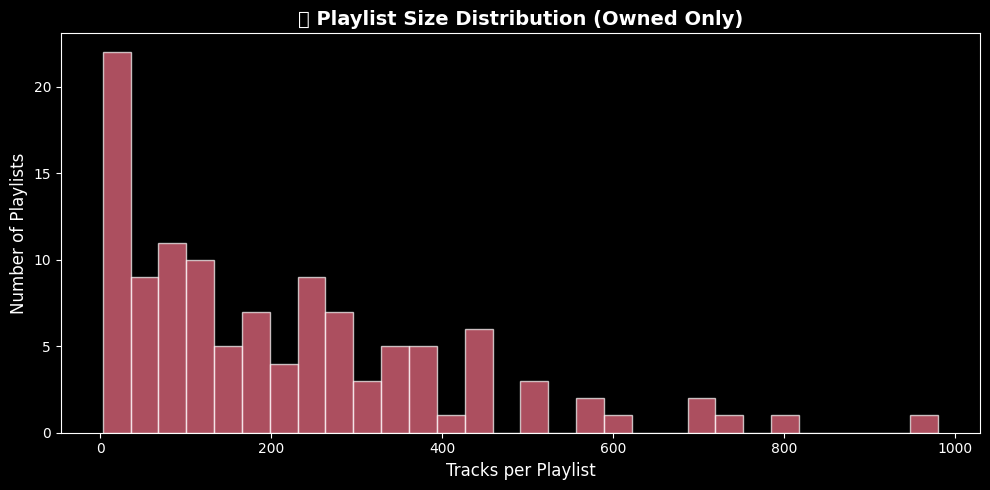

In [8]:
# Playlist size distribution
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(playlists["track_count"], bins=30, edgecolor='white', alpha=0.7)
ax.set_xlabel("Tracks per Playlist", fontsize=12)
ax.set_ylabel("Number of Playlists", fontsize=12)
ax.set_title("📂 Playlist Size Distribution (Owned Only)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5️⃣ Top Artists

In [9]:
# Count tracks per artist (primary artist only)
primary_artists = track_artists[track_artists["position"] == 0].copy()
primary_artists = primary_artists[primary_artists["track_id"].isin(owned_track_ids)]
artist_track_counts = primary_artists.groupby("artist_id").size().reset_index(name="track_count")
artist_track_counts = artist_track_counts.merge(artists[["artist_id", "name", "popularity", "followers"]], on="artist_id")
top_artists = artist_track_counts.nlargest(20, "track_count")

print("🎤 YOUR TOP ARTISTS (by # of tracks in owned playlists):\n")
top_artists[["name", "track_count", "popularity", "followers"]].head(15)

🎤 YOUR TOP ARTISTS (by # of tracks in owned playlists):



,name,track_count,popularity,followers
587,Drake,86,98,104906249
85,Travis Scott,58,91,41861766
1137,J. Cole,52,85,27349621
240,The Weeknd,45,96,115575232
110,Metro Boomin,40,86,11946962
342,Post Malone,38,88,47967648
428,Kendrick Lamar,35,91,45472722
880,Kanye West,34,92,31518836
42,SAINt JHN,33,67,1168360
718,Mac Miller,33,84,12311968


/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/2746676166.py:8: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


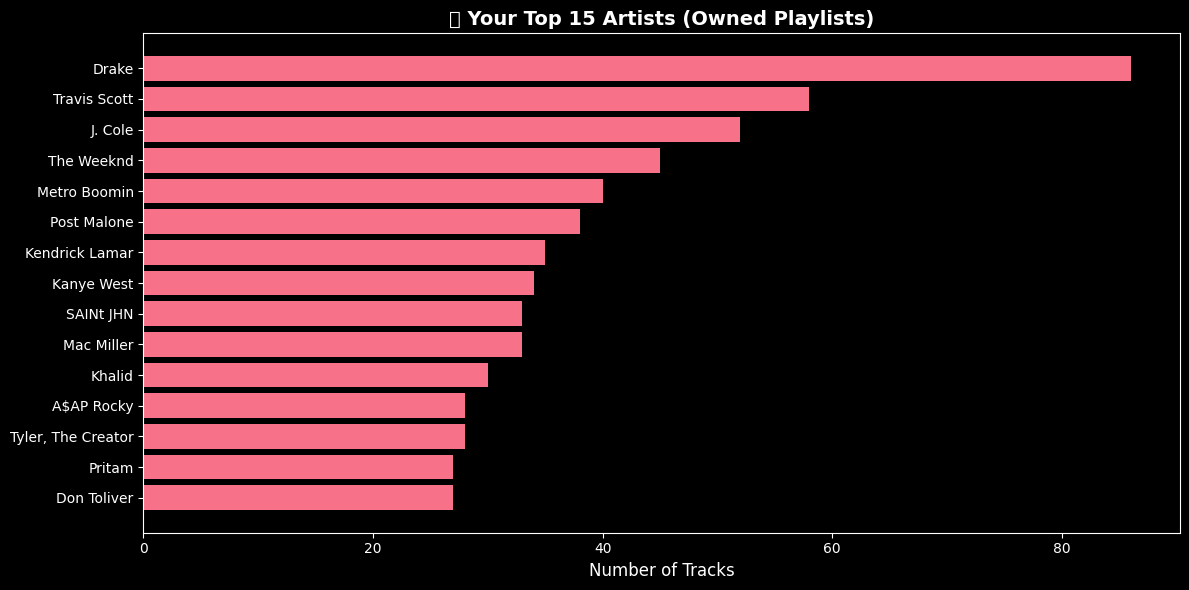

In [10]:
# Visualize top artists
fig, ax = plt.subplots(figsize=(12, 6))
top_15 = top_artists.head(15)
bars = ax.barh(top_15["name"], top_15["track_count"])
ax.set_xlabel("Number of Tracks", fontsize=12)
ax.set_title("🎤 Your Top 15 Artists (Owned Playlists)", fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 6️⃣ Genre Analysis

In [11]:
# Count all genres using imported get_genres_list from lib.py
all_genres = []
for genres in artists["genres"].apply(get_genres_list):
    all_genres.extend(genres)

genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(25), columns=["genre", "count"])

print(f"🎸 Found {len(genre_counts)} unique genres")
top_genres.head(15)

🎸 Found 366 unique genres


,genre,count
0,desi,92
1,bollywood,89
2,hindi pop,73
3,alternative r&b,55
4,house,54
5,grime,53
6,punjabi pop,53
7,jazz rap,51
8,uk grime,49
9,bedroom pop,43


/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/802574387.py:8: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127928 (\N{GUITAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


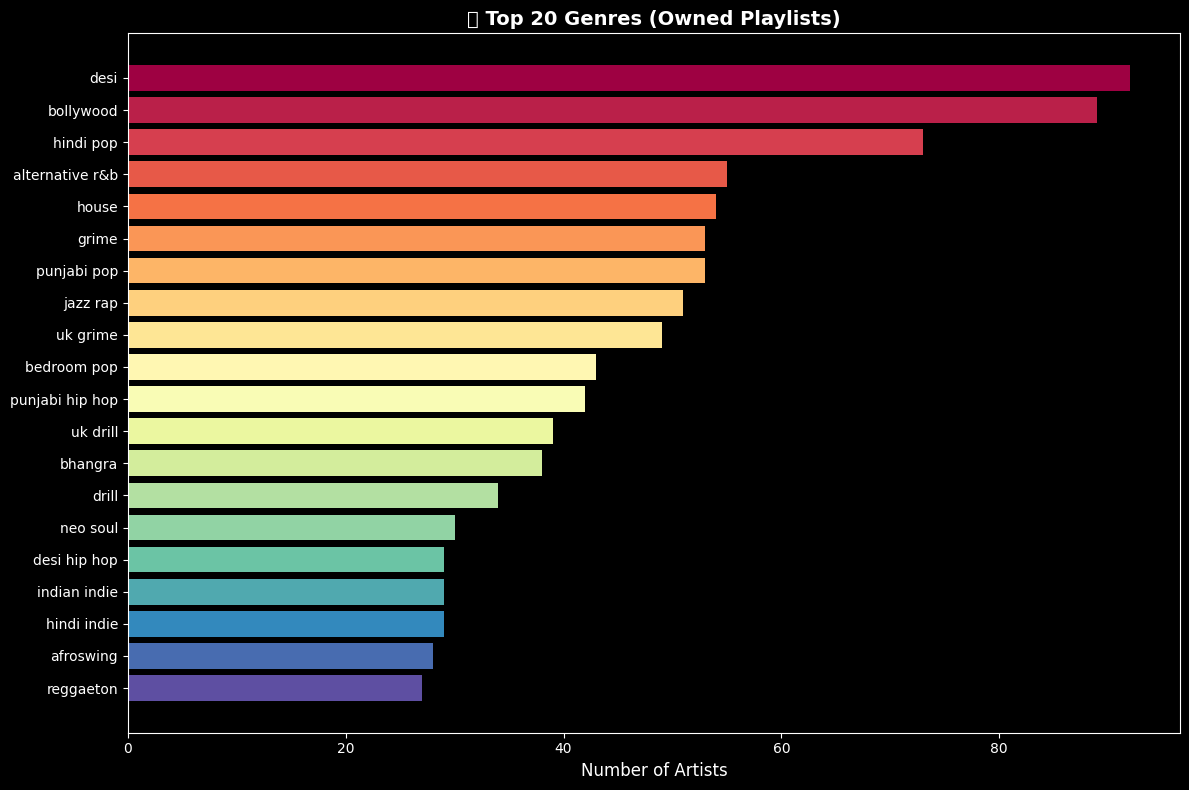

In [12]:
# Visualize top genres
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Spectral(np.linspace(0, 1, len(top_genres.head(20))))
bars = ax.barh(top_genres.head(20)["genre"], top_genres.head(20)["count"], color=colors)
ax.set_xlabel("Number of Artists", fontsize=12)
ax.set_title("🎸 Top 20 Genres (Owned Playlists)", fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

## 7️⃣ Popularity Analysis

/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/192064511.py:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/192064511.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


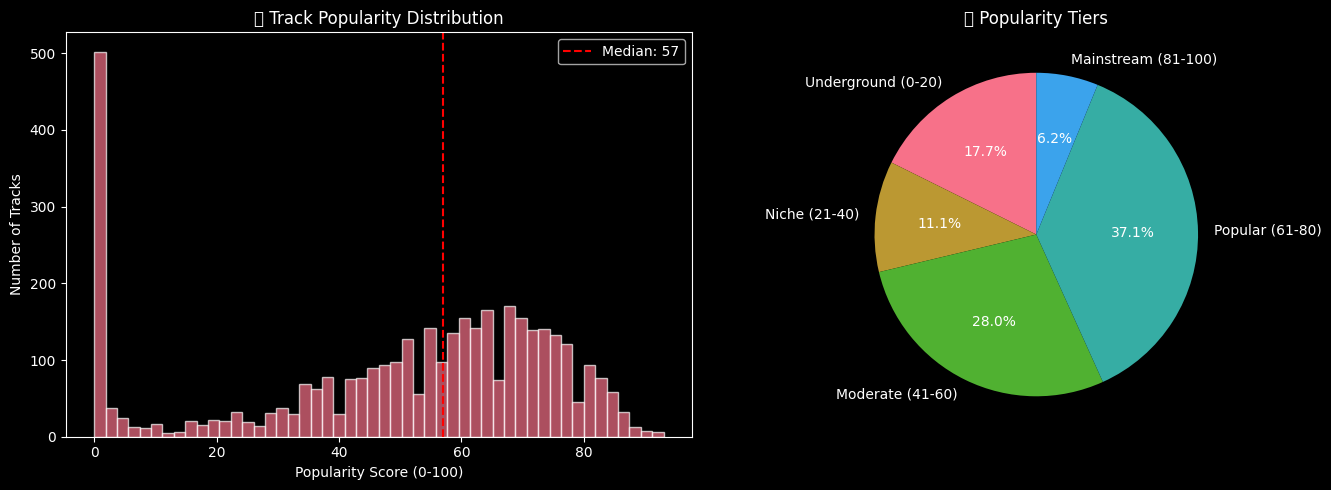


📊 Popularity stats:
   • Mean: 49.7
   • Median: 57.0
   • Underground tracks (0-20): 673


In [13]:
# Track popularity distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(tracks["popularity"], bins=50, edgecolor='white', alpha=0.7)
axes[0].axvline(tracks["popularity"].median(), color='red', linestyle='--', label=f'Median: {tracks["popularity"].median():.0f}')
axes[0].set_xlabel("Popularity Score (0-100)")
axes[0].set_ylabel("Number of Tracks")
axes[0].set_title("📈 Track Popularity Distribution")
axes[0].legend()

# Pie chart by tier
def popularity_tier(p):
    if p <= 20: return "Underground (0-20)"
    if p <= 40: return "Niche (21-40)"
    if p <= 60: return "Moderate (41-60)"
    if p <= 80: return "Popular (61-80)"
    return "Mainstream (81-100)"

tracks["tier"] = tracks["popularity"].apply(popularity_tier)
tier_order = ["Underground (0-20)", "Niche (21-40)", "Moderate (41-60)", "Popular (61-80)", "Mainstream (81-100)"]
tier_counts = tracks["tier"].value_counts().reindex(tier_order).fillna(0)

axes[1].pie(tier_counts, labels=tier_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("🎯 Popularity Tiers")

plt.tight_layout()
plt.show()

print(f"\n📊 Popularity stats:")
print(f"   • Mean: {tracks['popularity'].mean():.1f}")
print(f"   • Median: {tracks['popularity'].median():.1f}")
print(f"   • Underground tracks (0-20): {len(tracks[tracks['popularity'] <= 20]):,}")

## 8️⃣ Track Duration Analysis

/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/2769456814.py:11: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


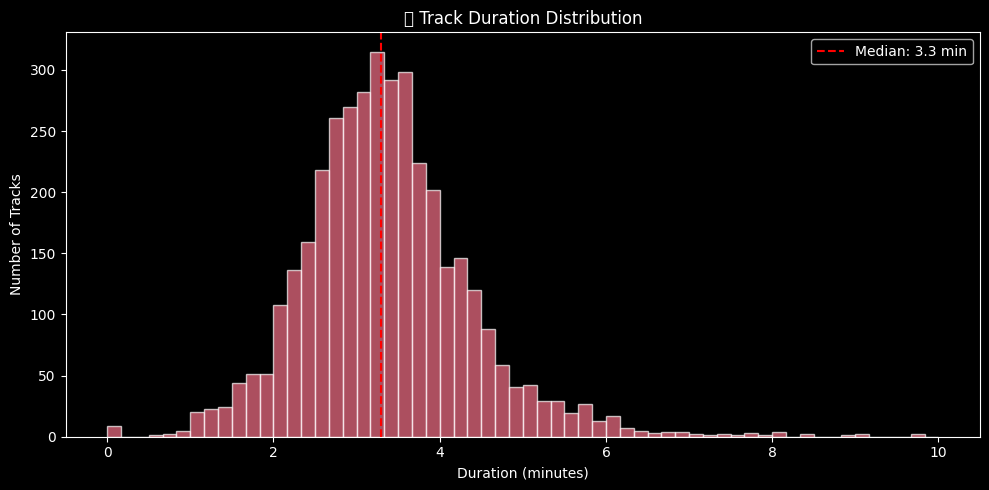


⏱️ Duration stats:
   • Average: 3.4 min
   • Median: 3.3 min
   • Shortest: 0.0 min
   • Longest: 10.8 min


In [14]:
# Convert to minutes
tracks["duration_min"] = tracks["duration_ms"] / 60000

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(tracks["duration_min"], bins=60, range=(0, 10), edgecolor='white', alpha=0.7)
ax.axvline(tracks["duration_min"].median(), color='red', linestyle='--', label=f'Median: {tracks["duration_min"].median():.1f} min')
ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Number of Tracks")
ax.set_title("⏱️ Track Duration Distribution")
ax.legend()
plt.tight_layout()
plt.show()

print(f"\n⏱️ Duration stats:")
print(f"   • Average: {tracks['duration_min'].mean():.1f} min")
print(f"   • Median: {tracks['duration_min'].median():.1f} min")
print(f"   • Shortest: {tracks['duration_min'].min():.1f} min")
print(f"   • Longest: {tracks['duration_min'].max():.1f} min")

## 9️⃣ Release Year Timeline

/var/folders/t5/pfc67fz125q3l2d_jvn8xh2c0000gq/T/ipykernel_51164/2393578922.py:21: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aryamaan/Desktop/Projects/spotifyframes_repo/.venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


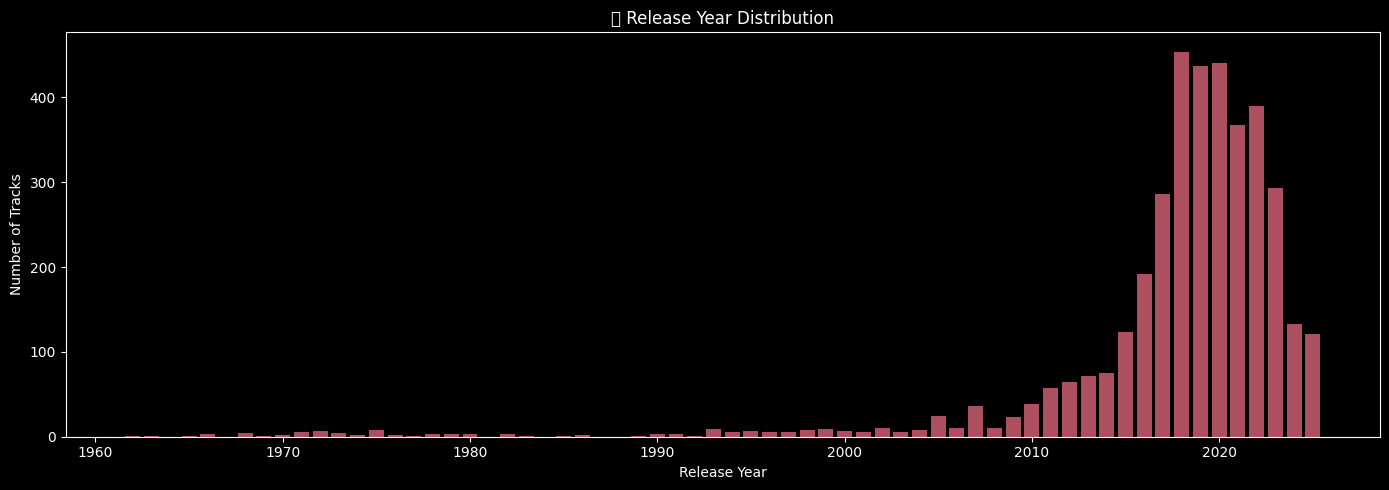


📅 Tracks by Decade:
   0s:  9 (0.2%)
   1950s:  1 (0.0%)
   1960s:  11 (0.3%)
   1970s:  38 (1.0%)
   1980s:  11 (0.3%)
   1990s: █ 58 (1.5%)
   2000s: ███ 140 (3.7%)
   2010s: ███████████████████████████████████████████████ 1,799 (47.2%)
   2020s: █████████████████████████████████████████████ 1,744 (45.8%)


In [15]:
# Extract release year
def extract_year(x):
    if pd.isna(x):
        return None
    try:
        return int(str(x)[:4])
    except:
        return None

tracks["release_year"] = tracks["release_date"].apply(extract_year)
year_counts = tracks["release_year"].dropna().value_counts().sort_index()

# Filter to reasonable range
year_counts = year_counts[(year_counts.index >= 1960) & (year_counts.index <= 2025)]

fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(year_counts.index, year_counts.values, alpha=0.7)
ax.set_xlabel("Release Year")
ax.set_ylabel("Number of Tracks")
ax.set_title("📅 Release Year Distribution")
plt.tight_layout()
plt.show()

# Decade breakdown
tracks["decade"] = (tracks["release_year"] // 10 * 10).astype("Int64")
decade_counts = tracks["decade"].dropna().value_counts().sort_index()

print("\n📅 Tracks by Decade:")
for decade, count in decade_counts.items():
    pct = count / len(tracks) * 100
    bar = "█" * int(pct)
    print(f"   {decade}s: {bar} {count:,} ({pct:.1f}%)")

## 🔟 Hidden Gems

Find great tracks with low popularity scores.

In [16]:
# Get primary artist for each track
primary = track_artists[track_artists["position"] == 0].merge(
    artists[["artist_id", "name"]], on="artist_id"
).rename(columns={"name": "artist_name"})

tracks_with_artist = tracks.merge(primary[["track_id", "artist_name"]], on="track_id", how="left")

# Hidden gems: tracks with popularity <= 30
hidden_gems = tracks_with_artist[
    (tracks_with_artist["popularity"] <= 30) & 
    (tracks_with_artist["popularity"] > 0)
].nlargest(20, "popularity")

print("💎 HIDDEN GEMS (great tracks with low popularity):\n")
hidden_gems[["name", "artist_name", "popularity", "album_name"]].head(15)

💎 HIDDEN GEMS (great tracks with low popularity):



,name,artist_name,popularity,album_name
57,Go Again,RIZ LA VIE,30,Go Again
132,2 Bricks Later,Domsta,30,2 Bricks Later
148,Low,Mura Masa,30,Someday Somewhere
485,Meeting Again in the Void - Just Piano Version,FKJ,30,Just Piano
1169,bootleg jordans,Saint Lane,30,i thought my name was cursed
1188,Pears,Weston Estate,30,Maggie Valley
1333,Ari Ari (Part 2),Bombay Rockers,30,Introducing…
1388,Ain't Times Hard,Nick Moss & The Flip Tops,30,Count Your Blessings
2075,LaDonda,Logic,30,Vinyl Days
2140,Beach Chair,JAY-Z,30,Kingdom Come


---

## ✅ Analysis Complete!

**Next steps:**
- `03_playlist_analysis.ipynb` - Deep dive into playlist genres and clustering
- `04_liked_songs_monthly_playlists.ipynb` - Split liked songs into monthly playlists